In [34]:
from CALCULATE_PLT_DLL import *
import matplotlib.pyplot as plt
plt.close('all')
#%matplotlib qt
import pdb

/user1/salmasi/miniconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [35]:
'''Ttrans post'''
#********************************************************************************************
def tccalc_AllPHS_Ttrans(T, L, elnames, xplot):  
    with TCPython() as start:
        system = start.set_cache_folder( "./_cache2").select_database_and_elements("TCFE9", elnames).get_system().with_single_equilibrium_calculation() 
        phase_lists_per_grid = {}
        phase_fraction_per_grid = {}
        x_phase_per_grid = {}
        output_1 = []
        acgraph=[]
        acs=[]
        for grid in range(len(L)):
            grid_values = {}
            system.set_condition("T", T[grid])
            for ie, el in enumerate(elnames[:-1]):
                system.set_condition("X({})".format(el), xplot[grid, ie])
            results = system.calculate()
            phases = results.get_stable_phases()
            phase_lists_per_grid[str(int(grid))] = phases        
            acgraph.append(results.get_value_of('ac(c,graph)'))
            ac_temp=np.zeros(len(elnames))
            
            for ie, el in enumerate(elnames[:]):
                ac_temp[ie]=results.get_value_of('ac({})'.format(el))
            acs.append(ac_temp)
            
            for ph in phases:      
                phase_fraction_per_grid['{}, {}'.format(grid, ph)] = results.get_value_of('npm({})'.format(ph))
                allXel_ph_ingrid = []
                for iee, ell in enumerate(elnames[:]):
                    allXel_ph_ingrid.append(results.get_value_of('X({}, {})'.format(ph, ell)))
                x_phase_per_grid['{}, {}'.format(grid, ph)] = np.array(allXel_ph_ingrid)
                ordered_el_names = []
                ordered_el_comp = []
                maxindx = np.flip(np.argsort(np.array(allXel_ph_ingrid), axis = 0))
                for i in maxindx:
                    ordered_el_names.append(elnames[i])
                    ordered_el_comp.append(allXel_ph_ingrid[i])
                grid_values[ph] = [results.get_value_of('npm({})'.format(ph)), np.array(allXel_ph_ingrid), ordered_el_names, np.array(ordered_el_comp)]
            output_1.append(grid_values)
    clear_output(wait = False)
    return output_1,acgraph,np.array(acs)
#********************************************************************************************
def get_values_Ttrans():
    '''Change to the desired path'''
    pth = change_path()
    '''Loading the data from txt files'''
    mfs, elnames, vmps, ts, vprs, npms, phnames, chem_pots = read_profiles()
    '''Selecting time steps'''
    tidx1 = 0
    tidx2 = len(ts)//2
    tidx3 = len(ts)-1
    '''geting values of selected time steps from Data'''
    mf1, npm1, chem_pot1, vmp1, phnames21, t1 = get_values_tindex(phnames, elnames, tidx1, npms, mfs, chem_pots, ts, vmps, vprs)
    mf2, npm2, chem_pot2, vmp2, phnames22, t2 = get_values_tindex(phnames, elnames, tidx2, npms, mfs, chem_pots, ts, vmps, vprs)
    mf3, npm3, chem_pot3, vmp3, phnames23, t3 = get_values_tindex(phnames, elnames, tidx3, npms, mfs, chem_pots, ts, vmps, vprs)
    '''Post processing with TC-python '''
    Ttrans =  973+2.7E6*(vmp3*1e-6)-6e9*(vmp3*1e-6)**2
    all_grid_values3,accgraph,acs = tccalc_AllPHS_Ttrans(Ttrans, vmp3, elnames, mf3)
    '''Reading post processed data of a time index'''
    xph_pp, npm_pp, ph_names_pp, Lpp = get_tc_results_mf_npm_all_phases(all_grid_values3, tidx3, vmp3, elnames)
    clear_output(wait = False)
    '''Correcting phase indexes'''
    npm_pp_corrected, xph_pp_corrected = correct_phase_indexes(vmp3, xph_pp, npm_pp, elnames)
    '''summarize'''
    print(pth)
    print('{:1.2e}, {:1.2e}'.format(vmp1[0], vmp1[-1]))
    print('{:1.2e}, {:1.2e}'.format(vmp3[0], vmp3[-1]))
    print('Ldiff = {:1.2e}, {:1.2e}'.format(vmp3[0]-vmp1[0], vmp3[-1]-vmp1[-1] ))
    print('t1 = {:2.1e} sec,  t2 = {:2.1e} sec,  t3 = {:2.1e} sec'.format(t1, t2, t3))    
    return pth, mfs, elnames, vmps, ts, vprs, npms, phnames, chem_pots, \
           tidx1, tidx2, tidx3, mf1, mf2, mf3 , npm1, npm2, npm3 , chem_pot1, chem_pot2, chem_pot3, \
           vmp1, vmp2, vmp3, phnames21, phnames22, phnames23, t1, t2, t3, \
           all_grid_values3, xph_pp, npm_pp, ph_names_pp, Lpp, npm_pp_corrected, xph_pp_corrected, accgraph, Ttrans, acs

In [36]:

pth, mfs, elnames, vmps, ts, vprs, npms, phnames, chem_pots\
,tidx1, tidx2, tidx3, mf1, mf2, mf3 , npm1, npm2, npm3, chem_pot1\
,chem_pot2, chem_pot3, vmp1, vmp2,vmp3, phnames21, phnames22\
,phnames23, t1, t2,t3, all_grid_values3, xph_pp, npm_pp, ph_names_pp\
,Lpp, npm_pp_corrected, xph_pp_corrected, accgraph, Ttrans,acs = get_values_Ttrans()

'''Deleting png files'''
#plt.close('all')
del_pngs()

/slask/salmasi/wcco-intraction/wcco-tial/1d/Ttrans/01-WC6CO-BCC-200um-50um-FCC1234-BCC12345-DICTRAFCC-M6-M12-MCSHP-LiQ12-2openBC-3600sec
2.50e-01, 2.50e+02
2.50e-01, 2.49e+02
Ldiff = -1.81e-06, -5.84e-01
t1 = 0.0e+00 sec,  t2 = 1.4e+01 sec,  t3 = 3.2e+01 sec


/user1/salmasi/miniconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<>:35: DeprecationWarning: invalid escape sequence \c

<>:35: DeprecationWarning: invalid escape sequence \c

<>:35: DeprecationWarning: invalid escape sequence \c

<ipython-input-61-a434b66b3e4a>:35: DeprecationWarning: invalid escape sequence \c



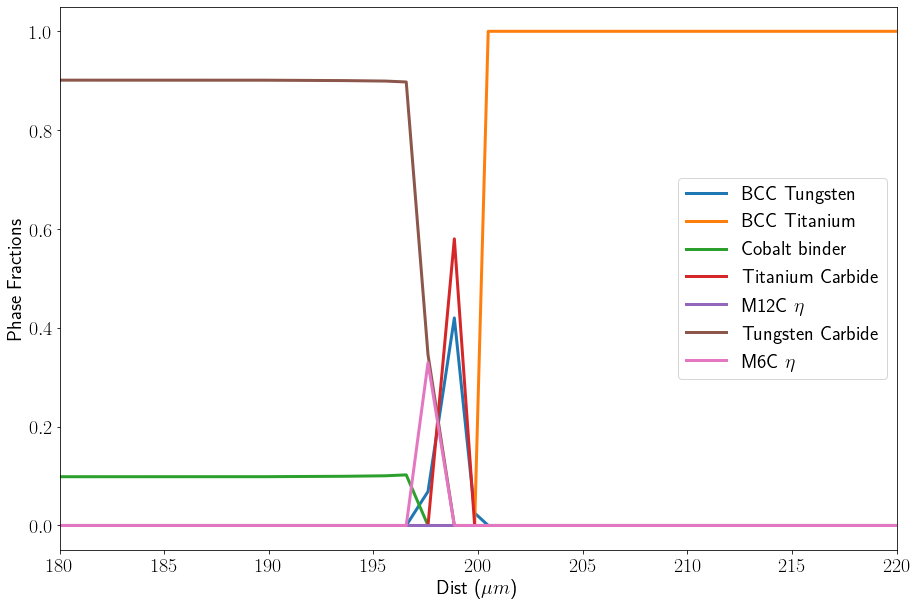

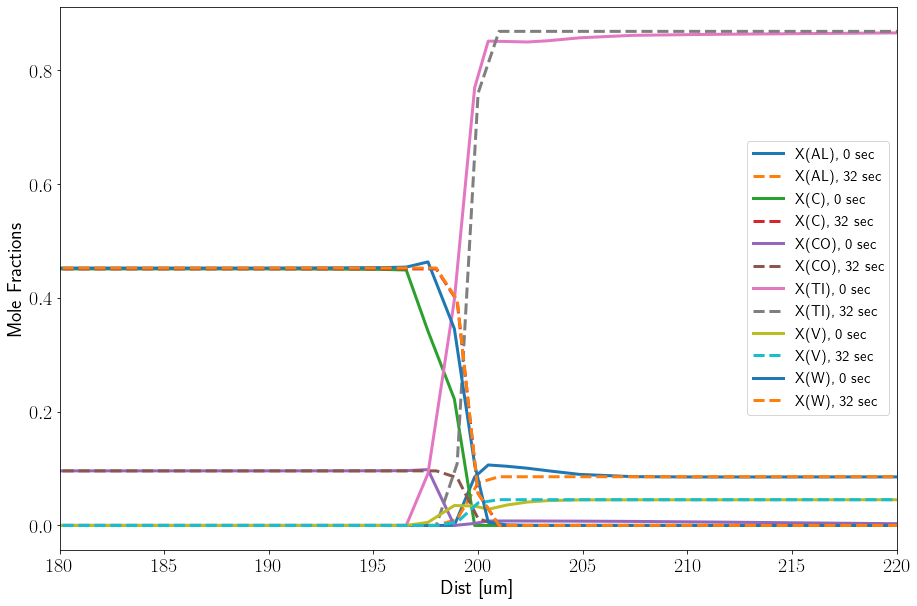

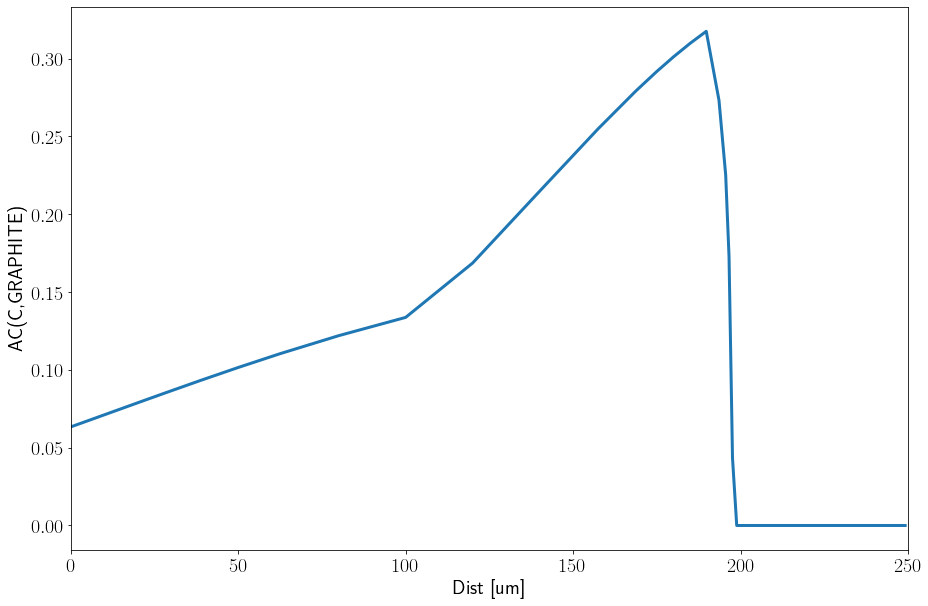

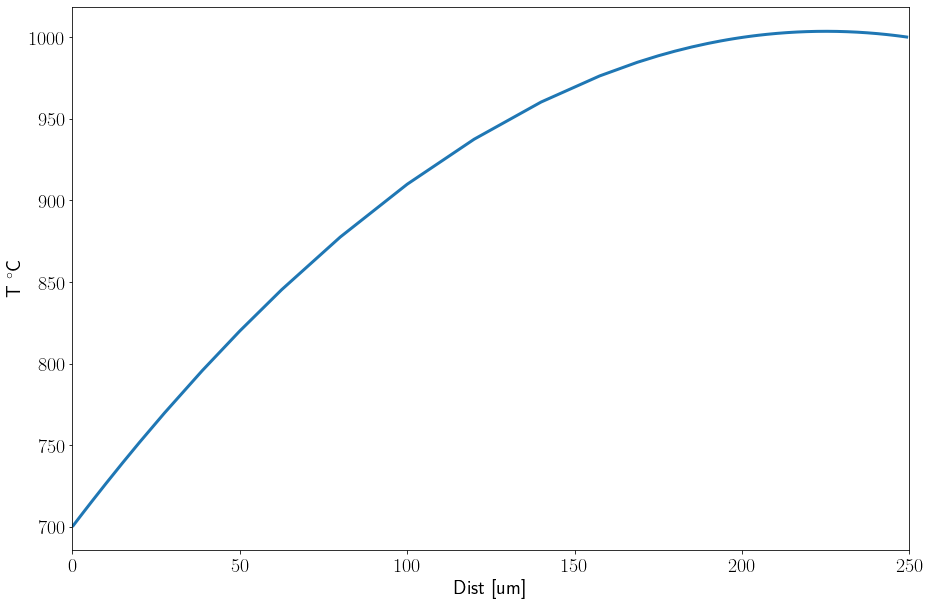

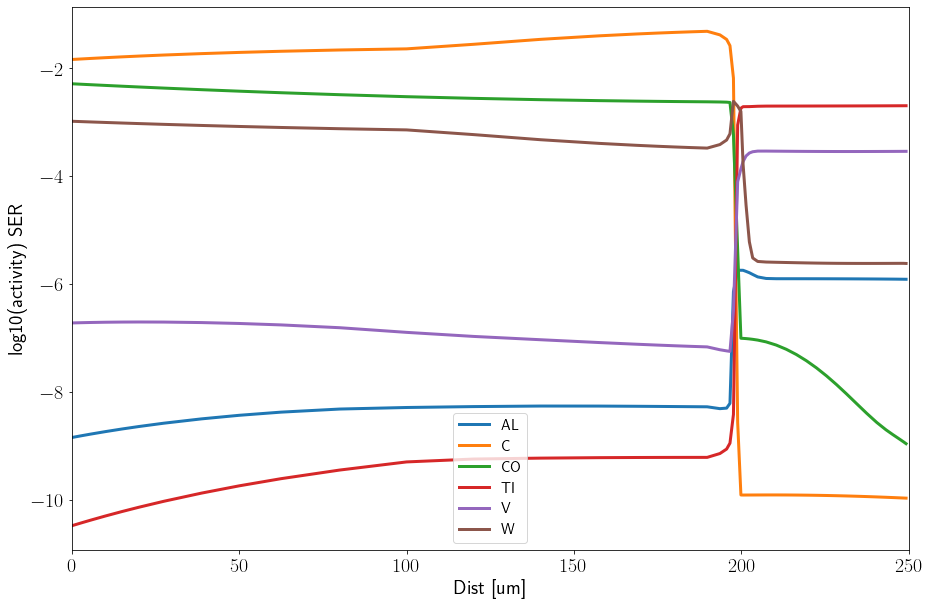

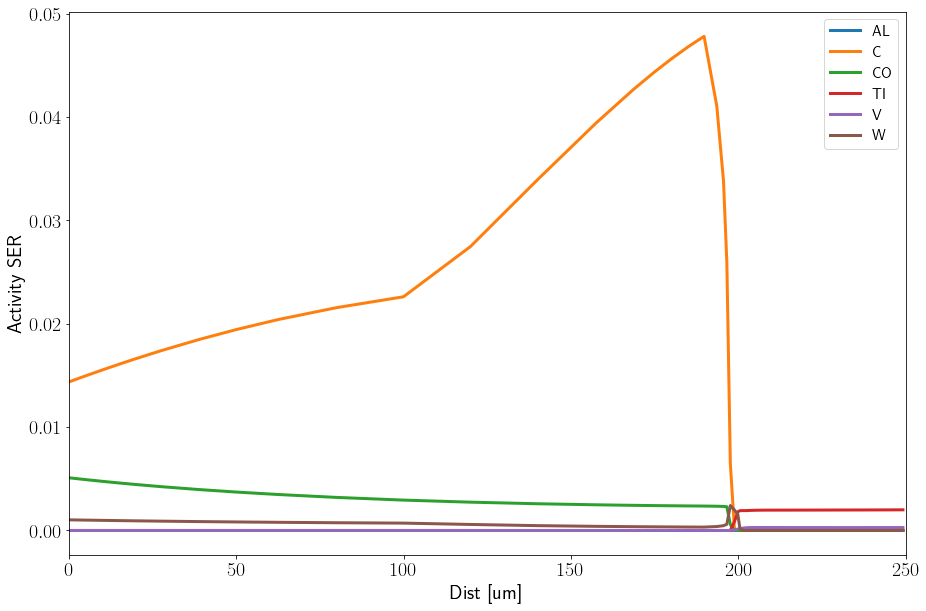

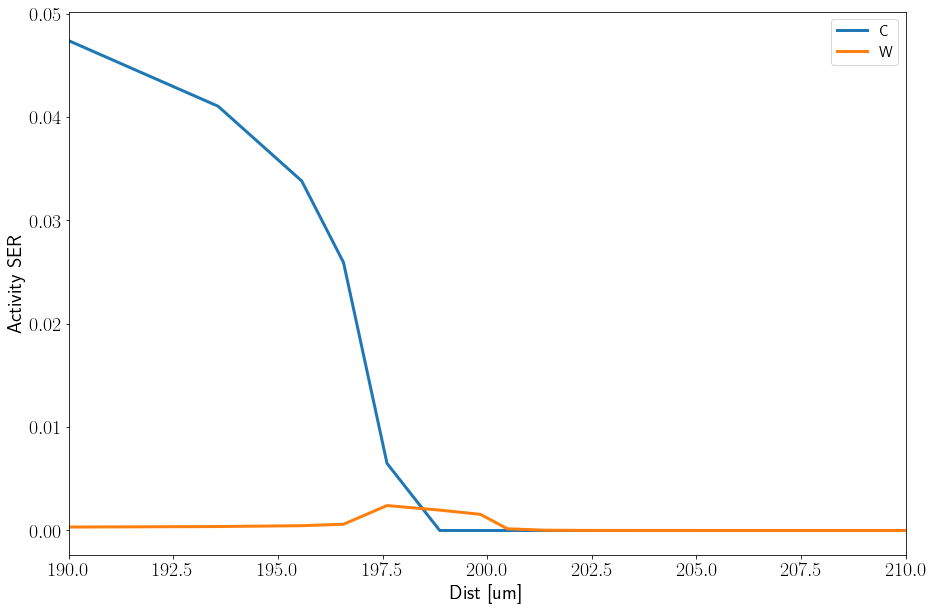

In [61]:
'''Setting plot xlimits, lim1,lim2=-1 : domain xlimits lim1,lim2='' : automatic'''
# lim1,lim2 = get_lims_gui(vmp3)
# xlim1,xlim2 = set_xlim(vmp1,vmp3,lim1,lim2)
params = {'text.usetex': True}
plt.rcParams.update(params)

xlim1,xlim2=180,220

'''Plotting corrected NPMs'''
fsize, lsize, tsize, bins, tksize, stsize, lgsize = 20, 20, 30, 8, 20, 30, 20
plot_tc_corrected_results_phf_all_phases(npm_pp_corrected, xph_pp_corrected, tidx3, ts, vmp3, xlim1, xlim2 \
                                        , fsize, lsize, tsize, bins, tksize, stsize, lgsize )

'''x1, x2, L1, L2, tt1, tt2, names, lim1 = -10, lim2 = -10, title ='', file_name='', fsize = 20, lsize = 20, tsize = 20, bins = 6, tksize = 20, stsize=20, lgsize=20, lwsize=20):'''
plot_allx_2ts(mf3, mf1, vmp3, vmp1, t1, t3, elnames, xlim1, xlim2, '', 'mfs-190-200-{:3.0f}-{:.0f}'.format(t3,t1),20, 20, 30, 8, 20, 30, 15,3)



'''Plotting AC(c,graph)'''
lsize,tksize= 20,20
plt.figure(figsize=[15,10])
plt.plot(vmp3,accgraph,linewidth=3)
plt.xlabel('Dist [um]', fontsize = lsize)
plt.ylabel('AC(C,GRAPHITE)', fontsize = lsize)
plt.xticks(fontsize = tksize)
plt.yticks(fontsize = tksize)
plt.xlim([0, 250])
plt.savefig('ACC.png')


'''Plotting Temperature'''
plt.figure(figsize=[15,10])
plt.plot(vmp3, Ttrans-273,linewidth=3)
plt.xlabel('Dist [um]', fontsize = lsize)
plt.ylabel('T $^ \circ$C', fontsize = lsize)
plt.xticks(fontsize = tksize)
plt.yticks(fontsize = tksize)
plt.xlim([0, 250])
plt.savefig('T.png')

'''Plotting acs-SER'''
plt.figure(figsize=[15,10])
plt.plot(vmp3, np.log10(acs),linewidth=3)
plt.xlabel('Dist [um]', fontsize = lsize)
plt.ylabel('log10(activity) SER', fontsize = lsize)
plt.xticks(fontsize = tksize)
plt.yticks(fontsize = tksize)
plt.legend(elnames,fontsize=15)
plt.xlim([0, 250])
plt.savefig('log20-acs.png')


'''Plotting acs-SER'''
plt.figure(figsize=[15,10])
plt.plot(vmp3, acs,linewidth=3)
plt.xlabel('Dist [um]', fontsize = lsize)
plt.ylabel('Activity SER', fontsize = lsize)
plt.xticks(fontsize = tksize)
plt.yticks(fontsize = tksize)
plt.legend(elnames,fontsize=15)
plt.xlim([0, 250])
plt.savefig('acs.png')



'''Plotting acs-SER'''
plt.figure(figsize=[15,10])
plt.plot(vmp3, acs[:,1],linewidth=3)
plt.plot(vmp3, acs[:,-1],linewidth=3)

plt.xlabel('Dist [um]', fontsize = lsize)
plt.ylabel('Activity SER', fontsize = lsize)
plt.xticks(fontsize = tksize)
plt.yticks(fontsize = tksize)
plt.legend([elnames[1],elnames[-1]],fontsize=15)
plt.xlim([190, 210])
plt.savefig('acc-SER.png')